In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

In [40]:
numerator =  158000 - 136000

denominator = np.sqrt((41000**2 / 200000) + (2445**2 / 200000))

t = (numerator / denominator)

t

1767.7091735149286

In [2]:
df = pd.read_pickle('/data/fast1/glacierml/data/final_df_r.pkl')

In [3]:
df['TermType'][df['TermType'] == 0] = 'Land'
df['TermType'][df['TermType'] == 1] = 'Marine'
df['TermType'][df['TermType'] == 2] = 'Lake'
df['TermType'][df['TermType'] == 5] = 'Shelf'
df['Form'][df['Form'] == 0] = 'Glacier'
df['Form'][df['Form'] == 1] = 'Ice Cap'

/tmp/ipykernel_3150025/573219846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TermType'][df['TermType'] == 0] = 'Land'
/tmp/ipykernel_3150025/573219846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Form'][df['Form'] == 0] = 'Glacier'


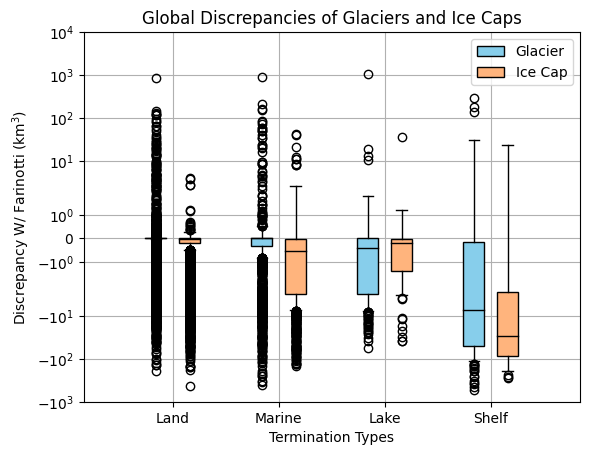

Number of outliers for Glacier: [0, 30477, 0, 449, 0, 34, 0, 19]
Number of outliers for Ice Cap: [1051, 0, 139, 0, 10, 0, 3, 0]
Total number of data points for Glacier: [0, 205998, 0, 2132, 0, 234, 0, 135]
Total number of data points for Ice Cap: [5987, 0, 938, 0, 64, 0, 31, 0]
Percent outliers for Glacier: [ 0.   14.79  0.   21.06  0.   14.53  0.   14.07]
Percent outliers for Ice Cap: [17.55  0.   14.82  0.   15.62  0.    9.68  0.  ]


In [21]:
import numpy as np
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

outliers_glacier = []
outliers_ice_cap = []
total_glacier = []
total_ice_cap = []
percent_outliers_glacier = []
percent_outliers_ice_cap = []

for term_type, group_data in combined_data.groupby('TermType'):
    glacier_r = group_data[group_data['Form'] == 'Glacier']['r']
    ice_cap_r = group_data[group_data['Form'] == 'Ice Cap']['r']

    # Plot boxplots for glaciers
    glacier_bp = plt.boxplot(glacier_r,
                             positions=[term_type - 0.25],
                             widths=0.2,
                             patch_artist=True,
                             labels=['Glacier'],
                             medianprops=dict(color='black', linewidth=1))

    # Plot boxplots for ice caps
    ice_cap_bp = plt.boxplot(ice_cap_r,
                             positions=[term_type + 0.25],
                             widths=0.2,
                             patch_artist=True,
                             labels=['Ice Cap'],
                             medianprops=dict(color='black', linewidth=1))

    # Color the boxes for glaciers and ice caps
    glacier_bp['boxes'][0].set_facecolor((0.529, 0.808, 0.922))
    ice_cap_bp['boxes'][0].set_facecolor((1.000, 0.706, 0.490))

    # Count outliers for glaciers
    num_outliers_glacier = len(glacier_bp['fliers'][0].get_data()[1])
    outliers_glacier.append(num_outliers_glacier)

    # Count outliers for ice caps
    num_outliers_ice_cap = len(ice_cap_bp['fliers'][0].get_data()[1])
    outliers_ice_cap.append(num_outliers_ice_cap)

    # Calculate total number of data points for glaciers
    num_data_points_glacier = len(glacier_r)
    total_glacier.append(num_data_points_glacier)

    # Calculate total number of data points for ice caps
    num_data_points_ice_cap = len(ice_cap_r)
    total_ice_cap.append(num_data_points_ice_cap)

    # Calculate percentage of outliers for glaciers (avoid division by zero)
    percent_outliers_glacier.append((num_outliers_glacier / num_data_points_glacier * 100) if num_data_points_glacier != 0 else 0)

    # Calculate percentage of outliers for ice caps (avoid division by zero)
    percent_outliers_ice_cap.append((num_outliers_ice_cap / num_data_points_ice_cap * 100) if num_data_points_ice_cap != 0 else 0)

# Create legend handles with desired colors
legend_handles = [Patch(facecolor=(0.529, 0.808, 0.922), edgecolor='black', label='Glacier'),
                  Patch(facecolor=(1.000, 0.706, 0.490), edgecolor='black', label='Ice Cap')]

# Add legend
plt.legend(handles=legend_handles, loc='upper right')

plt.xlabel('Termination Types')
plt.ylabel('Discrepancy W/ Farinotti (km$^3$)')
plt.title(f'Global Discrepancies of Glaciers and Ice Caps')
plt.xticks(range(len(termtype_mapping)), termtype_mapping.keys())
plt.grid(True)
plt.ylim([-1e3,1e4])
plt.yscale('symlog')
plt.show()

print("Number of outliers for Glacier:", (outliers_glacier))
print("Number of outliers for Ice Cap:", (outliers_ice_cap))
print("Total number of data points for Glacier:", (total_glacier))
print("Total number of data points for Ice Cap:", (total_ice_cap))
print("Percent outliers for Glacier:", np.round(percent_outliers_glacier, 2))
print("Percent outliers for Ice Cap:", np.round(percent_outliers_ice_cap, 2))


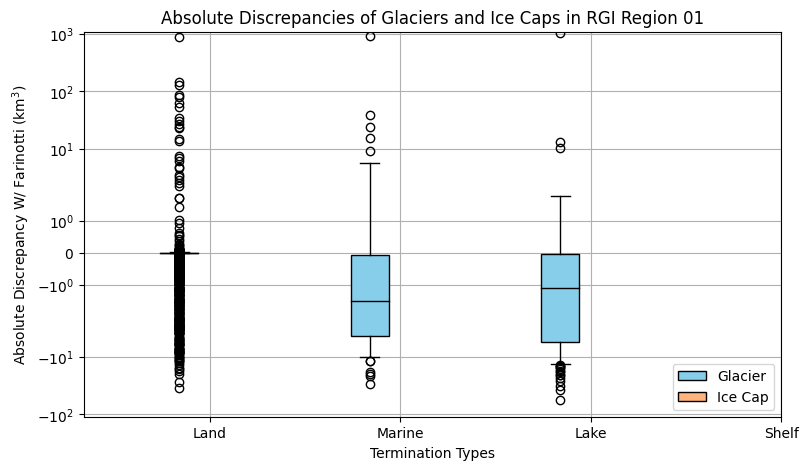

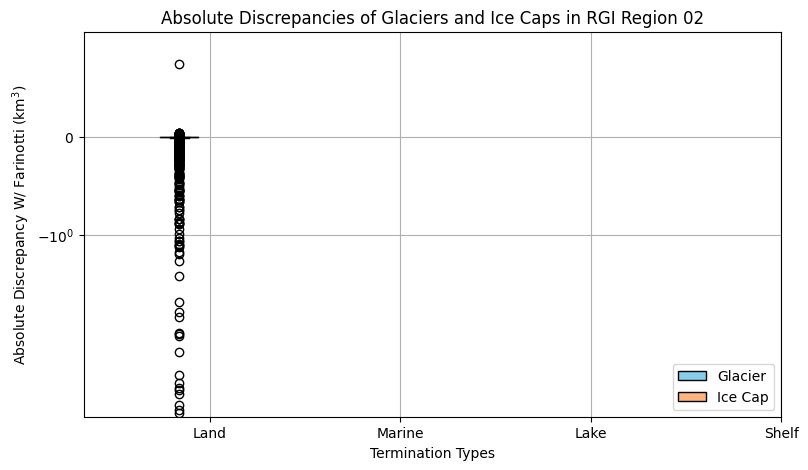

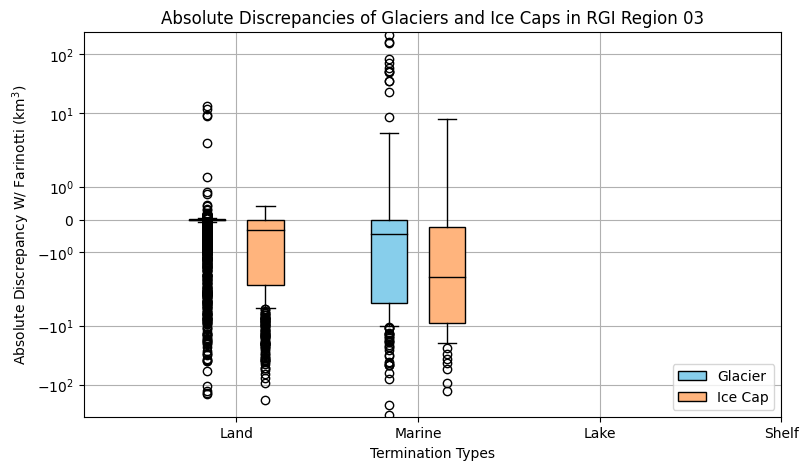

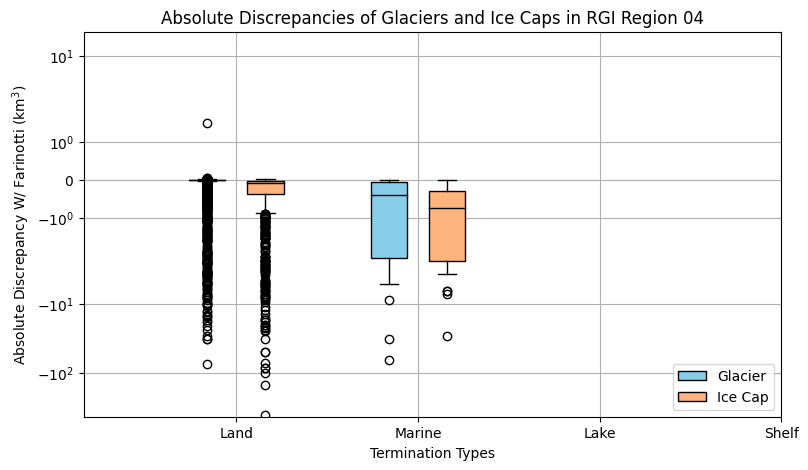

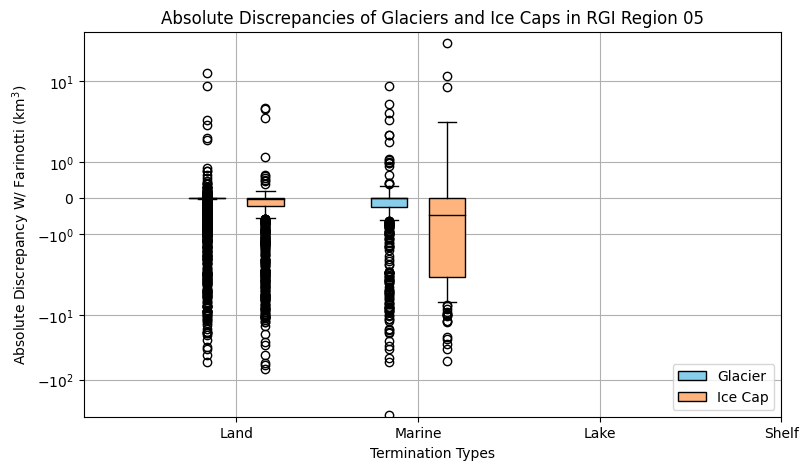

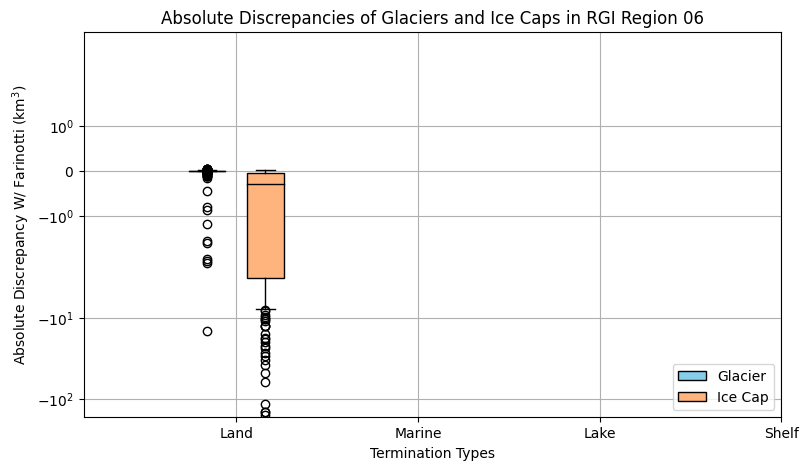

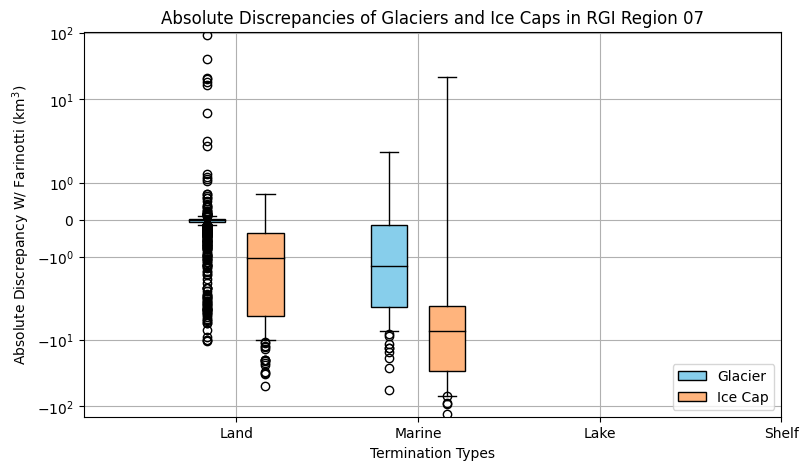

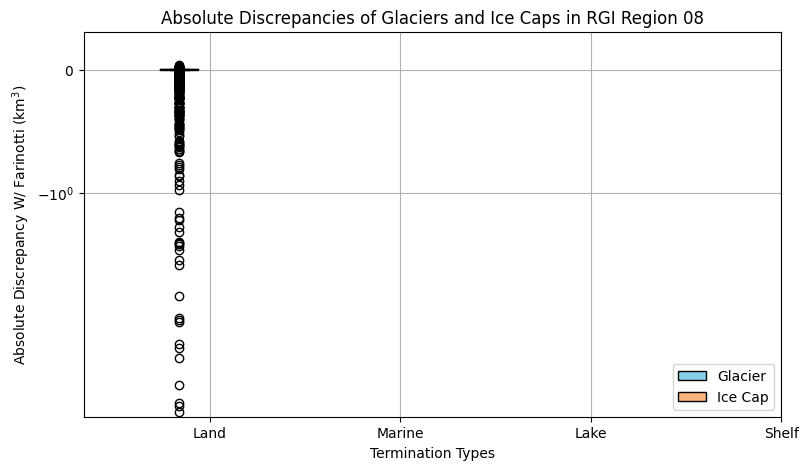

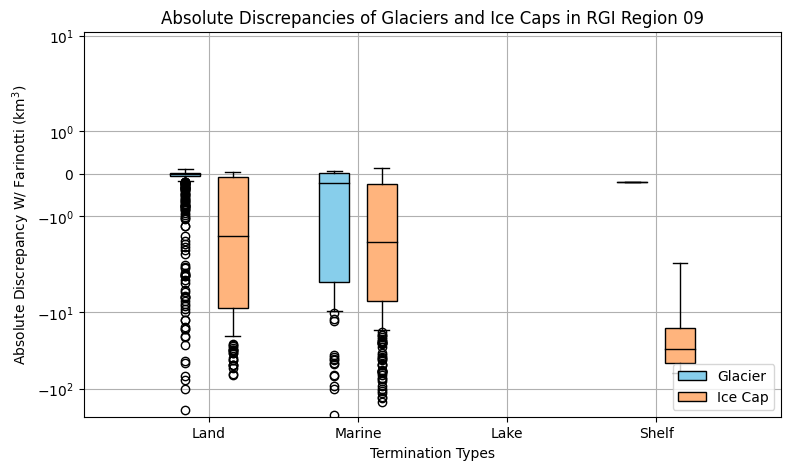

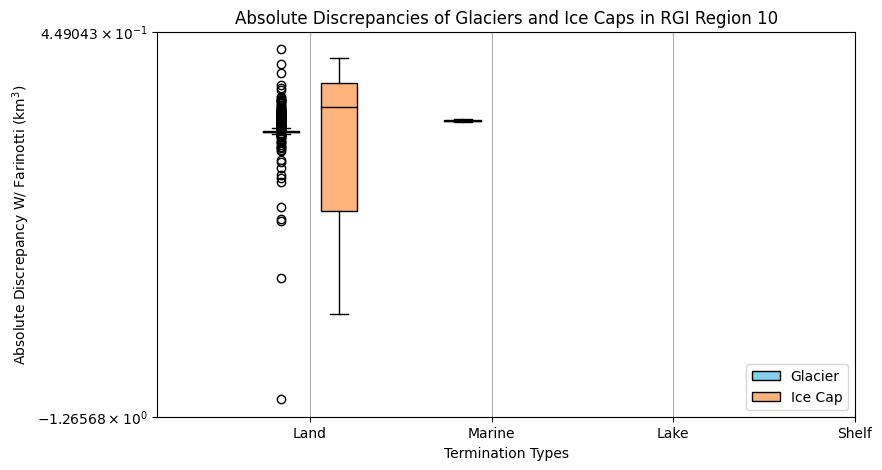

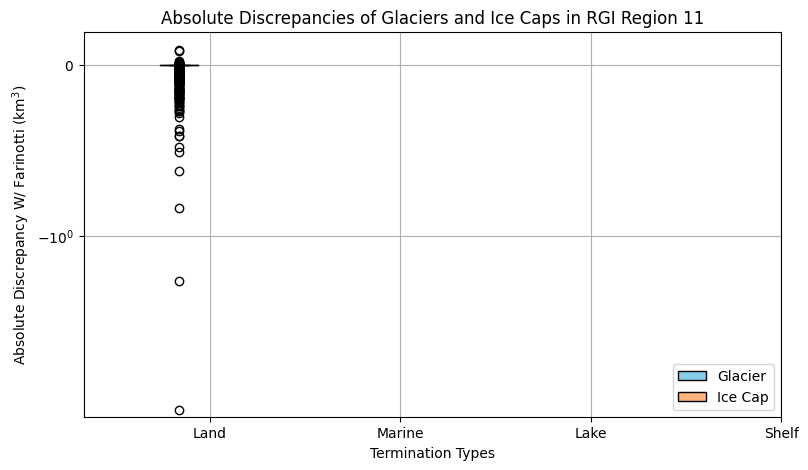

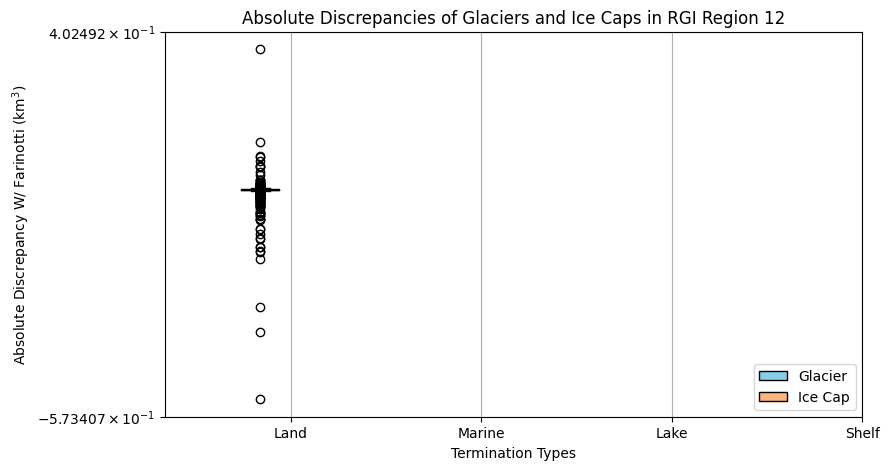

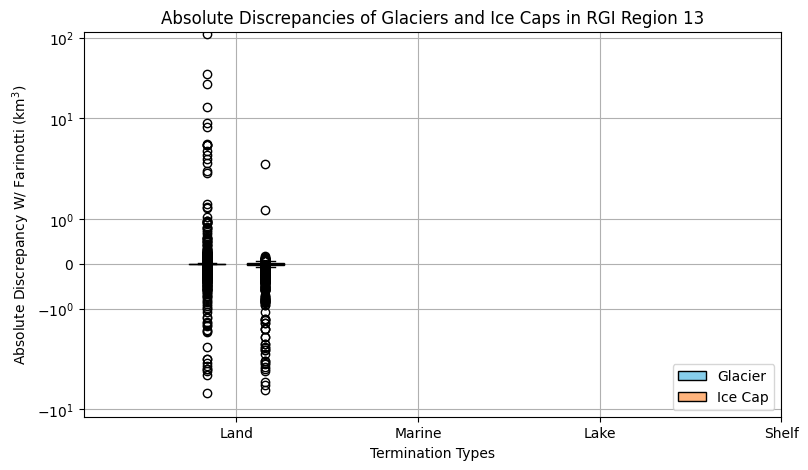

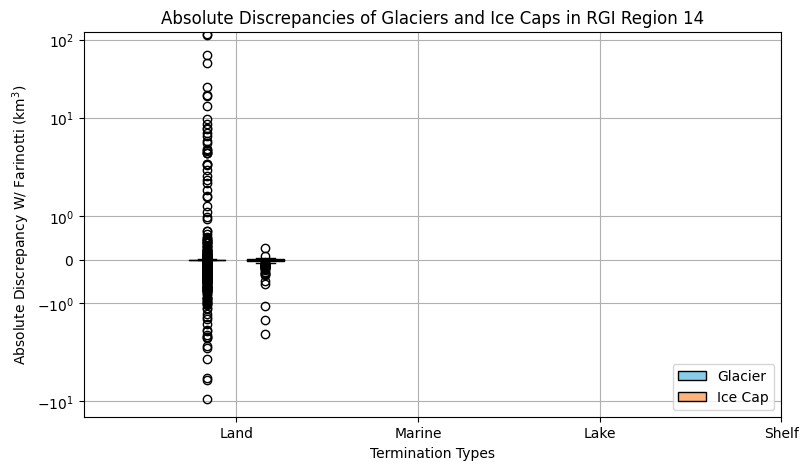

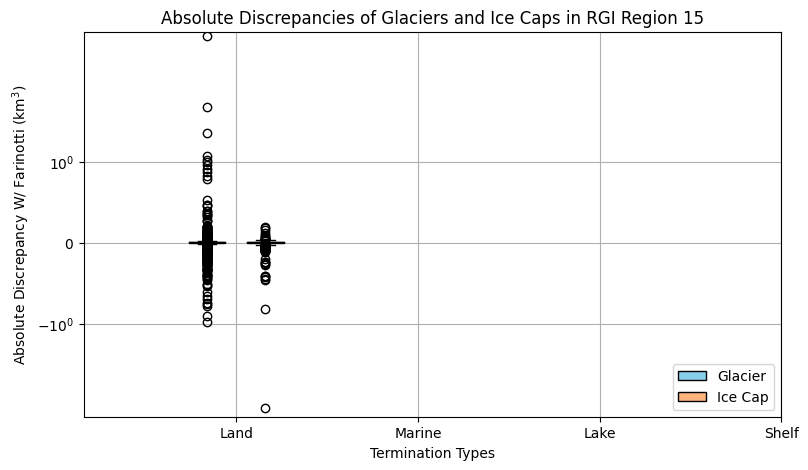

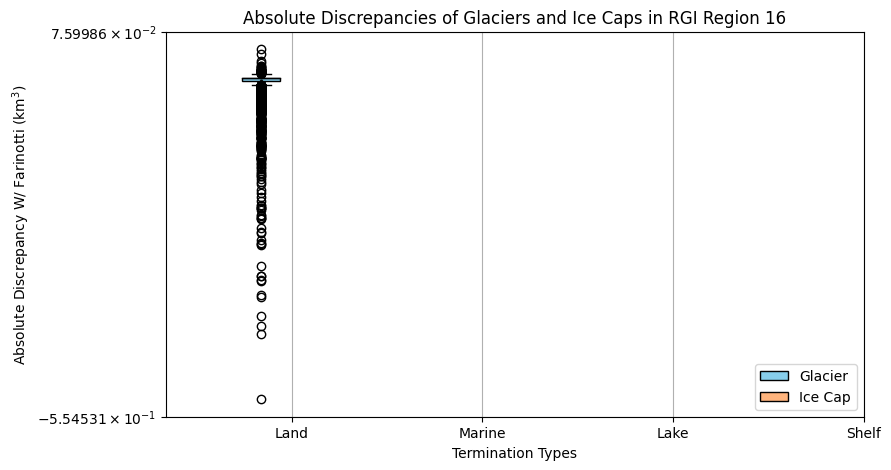

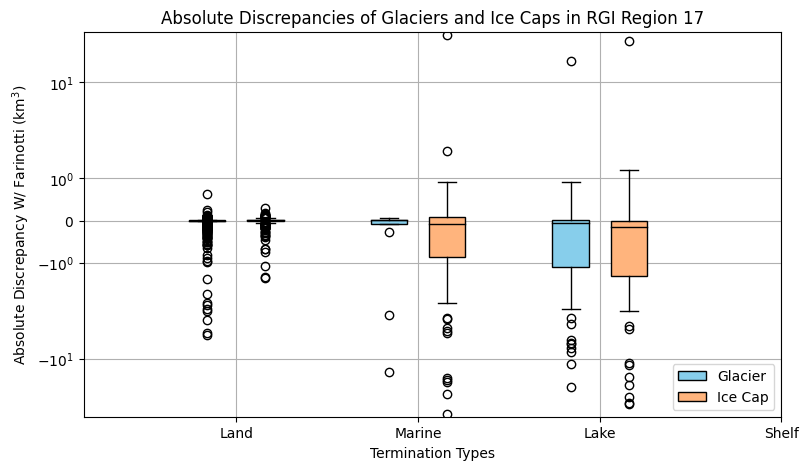

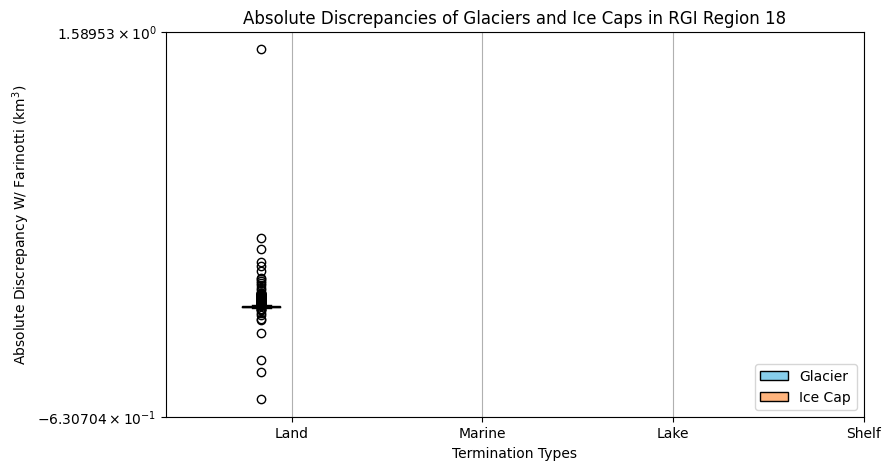

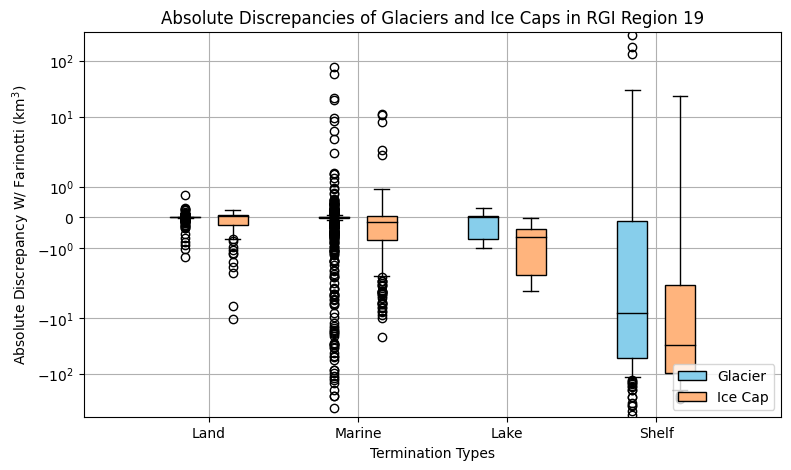

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

for region in df['region'].sort_values().unique():
    dft = df[df['region'] == region].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Adding an offset for better visualization
    offset = 0.09  # Adjust this value as needed

    # Create a dictionary to map categorical labels to numerical values
    termtype_mapping = {'Land': 0, 'Marine': 1, 'Lake': 2, 'Shelf': 3}

    # Apply the offset to glacier data
    glacier_data = dft[dft['Form'] == 'Glacier'].copy()  # Create a copy to avoid SettingWithCopyWarning
    glacier_data.loc[:, 'TermType'] = glacier_data['TermType'].map(termtype_mapping) + offset

    # Apply the offset to ice cap data
    ice_cap_data = dft[dft['Form'] == 'Ice Cap'].copy()  # Create a copy to avoid SettingWithCopyWarning
    ice_cap_data.loc[:, 'TermType'] = ice_cap_data['TermType'].map(termtype_mapping) - offset

    # Create combined data for plotting
    combined_data = pd.concat([glacier_data, ice_cap_data])

    # Plotting boxplots for each category
    plt.figure(figsize=(9, 5))

    for term_type, group_data in combined_data.groupby('TermType'):
        glacier_r = (group_data[group_data['Form'] == 'Glacier']['r'])
        ice_cap_r = (group_data[group_data['Form'] == 'Ice Cap']['r'])

        # Plot boxplots for glaciers
        glacier_bp = plt.boxplot(glacier_r,
                                 positions=[term_type - 0.25],
                                 widths=0.2,
                                 patch_artist=True,
                                 labels=['Glacier'],
                                 medianprops=dict(color='black', linewidth=1))

        # Plot boxplots for ice caps
        ice_cap_bp = plt.boxplot(ice_cap_r,
                                 positions=[term_type + 0.25],
                                 widths=0.2,
                                 patch_artist=True,
                                 labels=['Ice Cap'],
                                 medianprops=dict(color='black', linewidth=1))

        # Color the boxes for glaciers and ice caps
        glacier_bp['boxes'][0].set_facecolor((0.529, 0.808, 0.922))
        ice_cap_bp['boxes'][0].set_facecolor((1.000, 0.706, 0.490))

    # Create legend handles with desired colors
    legend_handles = [Patch(facecolor=(0.529, 0.808, 0.922), edgecolor='black', label='Glacier'),
                      Patch(facecolor=(1.000, 0.706, 0.490), edgecolor='black', label='Ice Cap')]

    # Add legend
    plt.legend(handles=legend_handles, loc='lower right')

    plt.xlabel('Termination Types')
    plt.ylabel('Absolute Discrepancy W/ Farinotti (km$^3$)')
    plt.title(f'Absolute Discrepancies of Glaciers and Ice Caps in RGI Region {region}')
    plt.xticks(range(len(termtype_mapping)), termtype_mapping.keys())
    plt.grid(True)
    plt.yscale('symlog')
    plt.show()
